In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from surprise.model_selection import train_test_split
from scipy.sparse import coo_matrix, csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from fastai.learner import *
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import cross_validate
from surprise import SVD

In [2]:
path_upper="/Users/pava/Documents/sjsu/category-upper-all-everything.txt"
df_upper = pd.read_csv(path_upper, sep=":")
del df_upper['total']

In [3]:
df_upper = df_upper.iloc[: , 1:]
df_upper

,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139704,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
139705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
## Feature Scaling
StandardScaler = StandardScaler()
df_upper_standardscalar = StandardScaler.fit_transform(df_upper)
df_upper_standardscalar

array([[-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       ...,
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516]])

In [5]:
kmeans = KMeans(n_clusters=12, random_state=42).fit(df_upper_standardscalar)
labels = kmeans.labels_

In [6]:
df_upper['label_kmeans'] = labels
df_upper

,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper,label_kmeans
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,11
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139704,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
139705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
139706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
139707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
centers = kmeans.cluster_centers_
# sns.scatterplot(x="t_floral",  y="t_stripe", hue=df_upper['label_kmeans'], data=df_upper)
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);

In [8]:
reduced_data = PCA(n_components=2).fit_transform(df_upper_standardscalar)
principalDf = pd.DataFrame(data = reduced_data
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-0.193382,-0.378107
1,-0.193382,-0.378107
2,-0.546912,0.829751
3,-0.193382,-0.378107
4,-0.193382,-0.378107
...,...,...
139704,-0.425510,2.288681
139705,-0.193382,-0.378107
139706,-0.193382,-0.378107
139707,-0.193382,-0.378107


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

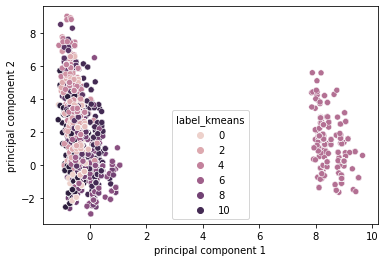

In [9]:
sns.scatterplot(x="principal component 1", y="principal component 2", hue=df_upper['label_kmeans'], data=principalDf)

In [10]:
path_lower="/Users/pava/Documents/sjsu/category-lower-all-everything.txt"
df_lower = pd.read_csv(path_lower, sep=":")
del df_lower['total']

In [11]:
df_lower = df_lower.iloc[: , 1:]
df_lower

,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58958,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58959,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58960,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58961,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
## Feature Scaling
df_lower_standardscalar = StandardScaler.fit_transform(df_lower)
df_lower_standardscalar

array([[-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       ...,
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646]])

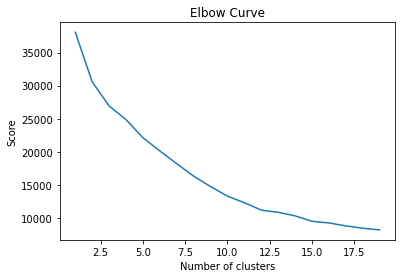

In [13]:
SSE = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=1500,n_init=10,random_state=0)
    kmeans.fit(df_lower)
    SSE.append(kmeans.inertia_)
plt.plot(range(1,20),SSE)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

In [14]:
kmeans_lower = KMeans(n_clusters=12, random_state=42).fit(df_lower_standardscalar)
labels_lower = kmeans.labels_

In [15]:
df_lower['label_kmeans'] = labels_lower
df_lower

,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper,label_kmeans
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,14
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,15
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58958,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
58959,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
58960,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
58961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
centers_lower = kmeans_lower.cluster_centers_

In [17]:
reduced_data_lower = PCA(n_components=2).fit_transform(df_lower_standardscalar)
principalDf_lower = pd.DataFrame(data = reduced_data_lower
             , columns = ['principal component 1', 'principal component 2'])
principalDf_lower

,principal component 1,principal component 2
0,1.881645,1.201123
1,-0.302310,-0.310525
2,-1.385094,-0.150626
3,0.664925,0.288594
4,-0.417858,0.448493
...,...,...
58958,-1.385094,-0.150626
58959,-1.385094,-0.150626
58960,-1.385094,-0.150626
58961,-0.302310,-0.310525


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

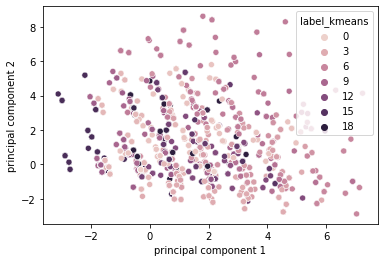

In [18]:
sns.scatterplot(x="principal component 1", y="principal component 2", hue=df_lower['label_kmeans'], data=principalDf_lower)

In [19]:
userrating = []

for i in range(0,100):
    x = random.randint(1,5)
    userrating.append(x)

top=[]
bottom=[]
for i in range(0,100):
    x = random.randint(1,139704)
    top.append(x)
    y = random.randint(1,139704)
    bottom.append(y)

In [20]:
df_top_bottom_rating = pd.DataFrame({'top': pd.Series(top), 'bottom': pd.Series(bottom), 'itemRating':pd.Series(userrating)})
df_top_bottom_rating

,top,bottom,itemRating
0,77541,114068,5
1,87183,72613,5
2,81719,58917,1
3,121941,80483,1
4,57680,126915,5
...,...,...,...
95,62144,113610,1
96,95468,118913,4
97,15664,9276,5
98,38660,90085,2


In [21]:
for i, j in df_top_bottom_rating["top"].iteritems():
    df_top_bottom_rating["topClusterRating"]=df_upper["label_kmeans"]


In [22]:
for i, j in df_top_bottom_rating["bottom"].iteritems():
    df_top_bottom_rating["bottomClusterRating"]=df_lower["label_kmeans"]

In [23]:
df_top_bottom_rating

,top,bottom,itemRating,topClusterRating,bottomClusterRating
0,77541,114068,5,1,14
1,87183,72613,5,1,0
2,81719,58917,1,11,2
3,121941,80483,1,1,15
4,57680,126915,5,1,18
...,...,...,...,...,...
95,62144,113610,1,1,0
96,95468,118913,4,1,0
97,15664,9276,5,1,0
98,38660,90085,2,1,2


In [24]:
cluster_mapping=df_top_bottom_rating[["topClusterRating", "bottomClusterRating", "itemRating"]]
cluster_mapping

,topClusterRating,bottomClusterRating,itemRating
0,1,14,5
1,1,0,5
2,11,2,1
3,1,15,1
4,1,18,5
...,...,...,...
95,1,0,1
96,1,0,4
97,1,0,5
98,1,2,2


In [25]:
cluster_mapping_average=cluster_mapping.groupby(['topClusterRating','bottomClusterRating'])['itemRating'].mean().reset_index()
cluster_mapping_average=pd.DataFrame(cluster_mapping_average)
cluster_mapping_average

,topClusterRating,bottomClusterRating,itemRating
0,0,14,4.000000
1,1,0,3.034483
2,1,1,2.000000
3,1,2,2.863636
4,1,3,2.000000
5,1,7,2.000000
6,1,10,2.000000
7,1,14,2.923077
8,1,15,2.000000
9,1,16,3.000000


In [26]:
rating_crosstab = cluster_mapping_average.pivot_table(values='itemRating', index='topClusterRating', columns='bottomClusterRating', fill_value=0)
rating_crosstab

bottomClusterRating,0,1,2,3,5,7,10,14,15,16,17,18
topClusterRating,,,,,,,,,,,,
0,0.000000,0,0.000000,0,0,0,0,4.000000,0,0,0,0.00
1,3.034483,2,2.863636,2,0,2,2,2.923077,2,3,3,3.75
2,0.000000,0,1.000000,0,0,0,0,1.000000,0,0,0,0.00
4,1.000000,0,3.000000,0,0,0,0,0.000000,0,0,0,0.00
6,0.000000,0,0.000000,0,0,0,0,3.000000,0,0,0,0.00
9,1.666667,0,2.000000,0,0,0,0,2.600000,0,0,0,0.00
10,1.000000,0,0.000000,0,0,0,0,0.000000,0,0,0,0.00
11,0.000000,0,1.500000,0,3,0,0,0.000000,0,0,0,0.00


In [27]:
X = cluster_mapping_average[['topClusterRating', 'bottomClusterRating', 'itemRating']]
y = cluster_mapping_average['topClusterRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train

,topClusterRating,bottomClusterRating,itemRating
1,1,0,3.034483
13,2,14,1.000000
5,1,7,2.000000
2,1,1,2.000000
11,1,18,3.750000
20,10,0,1.000000
3,1,2,2.863636
4,1,3,2.000000
18,9,2,2.000000
16,6,14,3.000000


In [28]:
df_ratings = X_train.pivot(index='topClusterRating', columns='bottomClusterRating', values='itemRating')

In [29]:
df_ratings

bottomClusterRating,0,1,2,3,5,7,10,14,17,18
topClusterRating,,,,,,,,,,
1,3.034483,2.0,2.863636,2.0,NaN,2.0,2.0,2.923077,3.0,3.75
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
4,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
9,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,2.600000,NaN,NaN
10,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,1.500000,NaN,3.0,NaN,NaN,NaN,NaN,NaN


In [30]:
df_ratings_dummy = df_ratings.copy().fillna(0)

In [31]:
df_ratings_dummy.head()

bottomClusterRating,0,1,2,3,5,7,10,14,17,18
topClusterRating,,,,,,,,,,
1,3.034483,2.0,2.863636,2.0,0.0,2.0,2.0,2.923077,3.0,3.75
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.00
4,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00
6,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3.000000,0.0,0.00
9,0.000000,0.0,2.000000,0.0,0.0,0.0,0.0,2.600000,0.0,0.00


In [32]:
similarity_matrix = cosine_similarity(df_ratings_dummy, df_ratings_dummy)

In [33]:
similarity_matrix_df = pd.DataFrame(similarity_matrix, index=df_ratings.index, columns=df_ratings.index)
similarity_matrix_df

topClusterRating,1,2,4,6,9,10,11
topClusterRating,,,,,,,
1,1.000000,0.362520,0.376337,0.362520,0.503880,0.376337,0.158827
2,0.362520,1.000000,0.000000,1.000000,0.792624,0.000000,0.000000
4,0.376337,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
6,0.362520,1.000000,0.000000,1.000000,0.792624,0.000000,0.000000
9,0.503880,0.792624,0.000000,0.792624,1.000000,0.000000,0.272671
10,0.376337,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
11,0.158827,0.000000,0.000000,0.000000,0.272671,0.000000,1.000000


In [34]:
def calculate_ratings(topClusterRating, bottomClusterRating):
    if topClusterRating in df_ratings:
        cosine_scores = similarity_matrix_df[bottomClusterRating] #similarity of bottomClusterRating with every other topClusterRating
        ratings_scores = df_ratings[topClusterRating]      #ratings of every other topClusterRating for the bottomClusterRating
        index_not_rated = ratings_scores[ratings_scores.isnull()].index
        ratings_scores = ratings_scores.dropna()
        cosine_scores = cosine_scores.drop(index_not_rated)
        ratings_cluster = np.dot(ratings_scores, cosine_scores)/cosine_scores.sum()
    else:
        return 2.5
    return ratings_cluster

In [35]:
similar_cluster=calculate_ratings(3,10) #predicts rating for topClusterRating 3 and bottomClusterRating 10
similar_cluster= int(similar_cluster)
similar_cluster

2

In [36]:
X_train['index'] = X_train.index

<ipython-input-36-2f822edc1790>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['index'] = X_train.index


In [37]:
X_train

,topClusterRating,bottomClusterRating,itemRating,index
1,1,0,3.034483,1
13,2,14,1.000000,13
5,1,7,2.000000,5
2,1,1,2.000000,2
11,1,18,3.750000,11
20,10,0,1.000000,20
3,1,2,2.863636,3
4,1,3,2.000000,4
18,9,2,2.000000,18
16,6,14,3.000000,16


In [38]:
predictedItem=X_train.loc[X_train['index'] == similar_cluster]
predictedItem

,topClusterRating,bottomClusterRating,itemRating,index
2,1,1,2.0,2


In [48]:
predictedtopCluster=predictedItem['topClusterRating']
predictedbottomCluster=predictedItem['bottomClusterRating']
predictedtopCluster=predictedtopCluster.reset_index(drop=True)
predictedbottomCluster=predictedbottomCluster.reset_index(drop=True)

predictedtopCluster

0    1
Name: topClusterRating, dtype: int64

In [49]:
df_top_bottom_rating
df_top_bottom_rating.loc[(df_top_bottom_rating['topClusterRating']==predictedtopCluster[0]) & (df_top_bottom_rating['bottomClusterRating']==predictedbottomCluster[0])]

,top,bottom,itemRating,topClusterRating,bottomClusterRating
66,113082,48400,2,1,1
